
# Prediction On Online Shopper's Intention On E-commerce Website

## Introduction

Online shopping has evolved into a substitute for traditional retail outlets over time because it is unquestionably a novel way to purchase. After the emergence of e-commerce, online shopping is now the third most common activity involving the internet due to the internet's increased service, efficiency, security, and ubiquity.
Customer intentions on e-commerce websites need to be studied to increase sales and find out the pain points experienced by customers based on visit patterns and their influence on transaction completion. Many e-commerce or technology companies are investing in early detection and predicting the behavior of salespersons in virtual shopping environments.
Vast number of people visiting e-commerce websites may not have the intention to make a purchase. This could be due to various reasons :
1. complex check out process
2. not visible search engines
3. Poor user experience
4. High prices or hidden charges
5. windows shopping

This project uses historical data from user visits to an e-commerce website for 1 year. Each line represents 1 user and how it behaves towards revenue. The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. The dataset consists of 10 numerical and 8 creative attributes. with 12,330 sessions of which 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

**Source:**
1. https://www.kaggle.com/datasets/henrysue/online-shoppers-intention
2. https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
3.https://link.springer.com/article/10.1007/s00521-018-3523-0
4. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7256375/
5. https://support.google.com/analytics/answer/2695658?hl=en&ref_topic=6156780
6. https://jurnal-ppi.kominfo.go.id/index.php/jppi/article/view/341

## Objective :
1. Looking for insight into visitor behavior patterns from page duration metrics, page types, page value, and rate to revenue
2. Develop a strategy to increase revenue from visitor sessions
3. Create a model to predict visitor behavior towards revenue using classification method

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# evaluation
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Data Dictionary

1. `Administrative` : Number of pages visited by the visitor about account management
2. `Administrative_Duration` : the amount of time (in seconds) spent on administrative page type
3. `Informational` : Number of pages visited by the visitor about Web site, communication and address information of the shopping site
4. `Informational_Duration`: The amount of time spent (in seconds) on informational page type
5. `ProductRelated` : Number of pages visted by visitor about product related pages
6. `ProductRelated_Duration`: the amount of time spent (in seconds) of product related page
7. `BounceRates` : The percentage of visitors who enter the website through that page and exit without triggering any additional tasks
8. `ExitRates` : The percentage of pageviews on the website that end at that specific page
9. `PageValues` : the average value of the page averaged over the value of the target page and/or the completion of an eCommerce
10. `SpecialDay` : this value represents the closeness of site visiting time date to specific special days (e.g Mother's Day or valentine's Day).  
11. `OperatingSystems` : an integer value representing the operating system that the user was on when viewing the page
12. `Month`: contains the month of page view occured (in string form)
13. `Browser` : an integer value representng the browser that the user was using to view the page
14. `Region` : an integer value representing which region the user located in
15. `TrafficType` : an integer value representing what type traffic that the user is categorized into (e.g banner, SMS, direct)
16. `VisitorType` :string representing wheter a visitoer is new vistor, returning visitor, or other
17. `Weekend` : a boolean representing wheter the session is on weekend
18. `Revenue` : a boolean representing wheter or not the use completed the purchase

**Note** :
The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12 ( 2 week before the special day), zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8 ( a week before special day.

## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.duplicated().sum()

125

In [6]:
data = data.drop_duplicates().reset_index(drop=True)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


**observation**
1. No missing Value
2. 125 duplicates data
3. Data type are fine

# Exploratory Data Analysis

In [7]:
# define the numerical and categorical feature
numericals = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',]
categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType','Month', 'VisitorType', 'Weekend', 'Revenue']

In [8]:
### Descriptive Statistic
data[numericals].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


**Observation :**

1. All the columns more likely have postive skewed since the value higher than median
2. The longest max duration pages time in descending order `productrelated_duration`  page (17 hours) , `Administrative_duration` page (apprx 1 hour), `informational_duration` page (apprx 43 minutes). it is necessary to do further analysis why there are users who have such a long duration on product related pages and how their behavior is towards revenue
3. table shows that `informational`and `adminsitrative` page have the lower visitors than `ProductRelated`, probably this page has unreachable or inappropiate UI/UX design for user, need a further investigate
4. we can say there are visitors who made purchased a week before `special day`  since the maksimum value is 1. we can investigate later how is the customer purchased according to special day
5. from the `BounceRates` column we can say approx half of visitors experience bounce rate which is not a good news and we can investigate later how the bouncerates influence to `revenue`
6. from the ` PageValues` we can say that there are more than a half of customer didn't visit our page because there are 0 value for Q1,Q2, and Q3. This is a serious problem since we need to improve the customer engagement to visit the valuable page and make purchased on the website


## Univariate Analysis

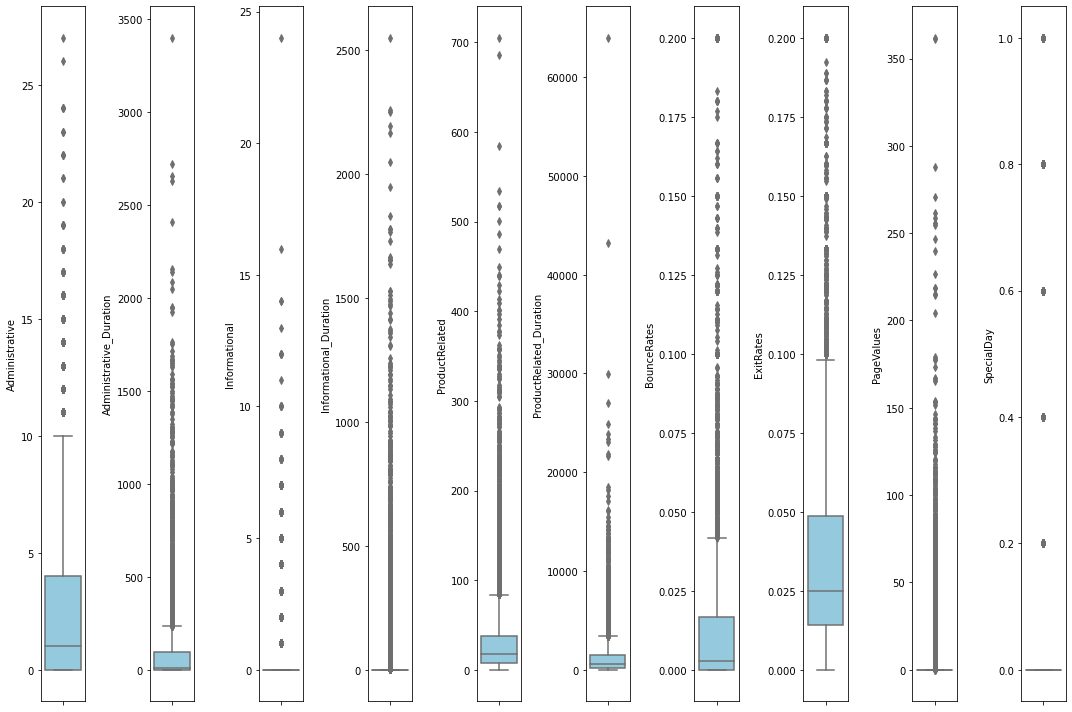

In [9]:
# adjust the figure size for better readability
plt.figure(figsize=(15,10))

# plotting
features = numericals
           
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

**observation :**
1. each features have so many outliers
2. we can say `adminstrative` and `informational` page are rarely visit than `product related page`
3. from `SpecialDay` we can say there are visitirs who did purchased close to the special day with diffrent interval, where the value is not zero (apprx 2 weeks before specia day) and the max value is 1 (1 weeks before sepcial day) we need to see they frequency and their behaviour towards revenue


### Outlier Visualization

In [10]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numericals:
    data_mean, data_std = mean(data[i]), std(data[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative : 

Identified outliers: 213
Non-outlier observations: 11992
Percent of outliers: 1.7451863990167964 

Administrative_Duration : 

Identified outliers: 230
Non-outlier observations: 11975
Percent of outliers: 1.8844735764031135 

Informational : 

Identified outliers: 260
Non-outlier observations: 11945
Percent of outliers: 2.1302744776730846 

Informational_Duration : 

Identified outliers: 229
Non-outlier observations: 11976
Percent of outliers: 1.8762802130274476 

ProductRelated : 

Identified outliers: 236
Non-outlier observations: 11969
Percent of outliers: 1.9336337566571076 

ProductRelated_Duration : 

Identified outliers: 217
Non-outlier observations: 11988
Percent of outliers: 1.7779598525194593 

BounceRates : 

Identified outliers: 593
Non-outlier observations: 11612
Percent of outliers: 4.858664481769766 

ExitRates : 

Identified outliers: 599
Non-outlier observations: 11606
Percent of outliers: 4.907824662023761 

PageValues : 

Identified outliers: 257
N

In [11]:
Outliers = pd.DataFrame({'Feature': numericals, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
7,ExitRates,4.907825
6,BounceRates,4.858664
9,SpecialDay,3.916428
2,Informational,2.130274
8,PageValues,2.105694
4,ProductRelated,1.933634
1,Administrative_Duration,1.884474
3,Informational_Duration,1.876280
5,ProductRelated_Duration,1.777960
0,Administrative,1.745186


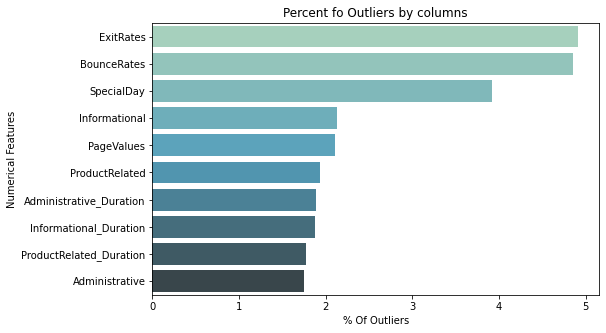

In [12]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Numerical Features')
plt.show()

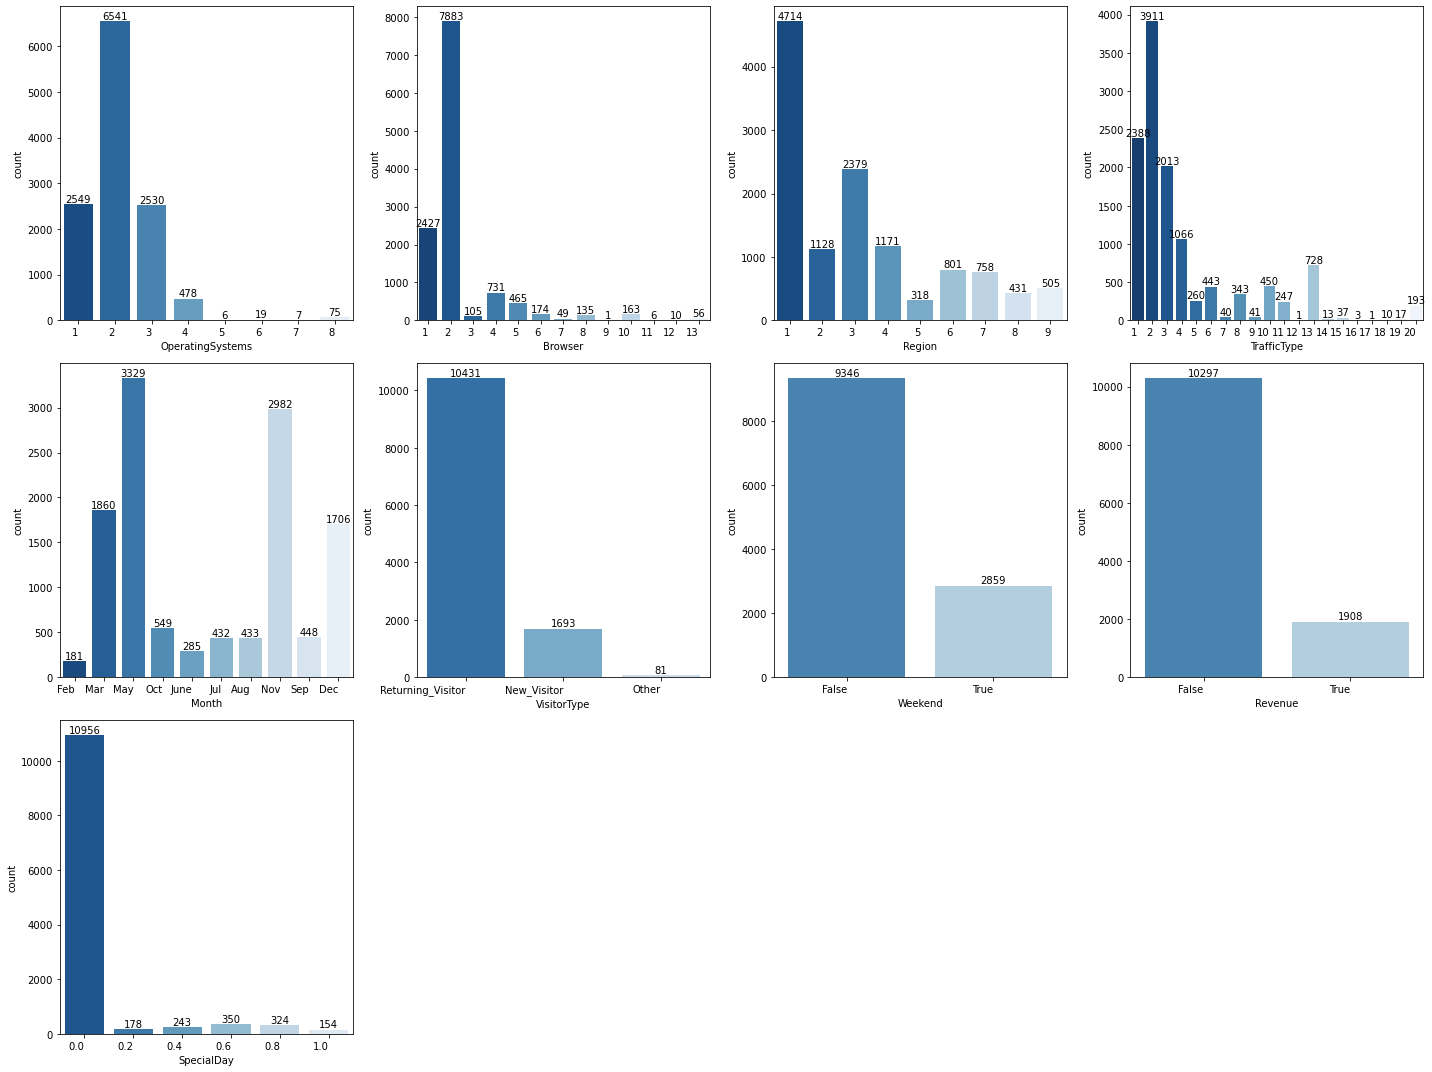

In [13]:
# Categorical Features Visualization
plt.figure(figsize=(20,15))

cat = ['OperatingSystems', 'Browser', 'Region', 'TrafficType','Month', 'VisitorType', 'Weekend', 'Revenue','SpecialDay']

features = cat
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3+1, i)
    ax=sns.countplot(x=data[features[i-1]], palette = 'Blues_r' )
    plt.xlabel(features[i-1])
    plt.xticks(rotation = 0, ha='right')
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

**Observation :**
1. This dataset is imbalance since the customers with `Revenue` is extremely lower than customers with no `Revenue`
2. Most of visitor create purchased in `weekday`
3. Most visitors use `OperationSystem` type 2
4. Most visitors use `Browser` type 3
5. Most visitors comes from `Region` 1
6. Most visitors use `TrafficType` 2
7. There are very few visitors at February and the higher `Month` is May
8. Returning `VisitorType` are much more than New visitors, indicates that our old customers are quiete active visiting the website, meanwhile we need to increase the new visitor population because its ony 1/10 of old cutomers population
9. for this year visitors there was not much customers who made purchased that close to `SpecialDay` which means that customer purchased was not that influenced by the special day

## Multivariate Analysis

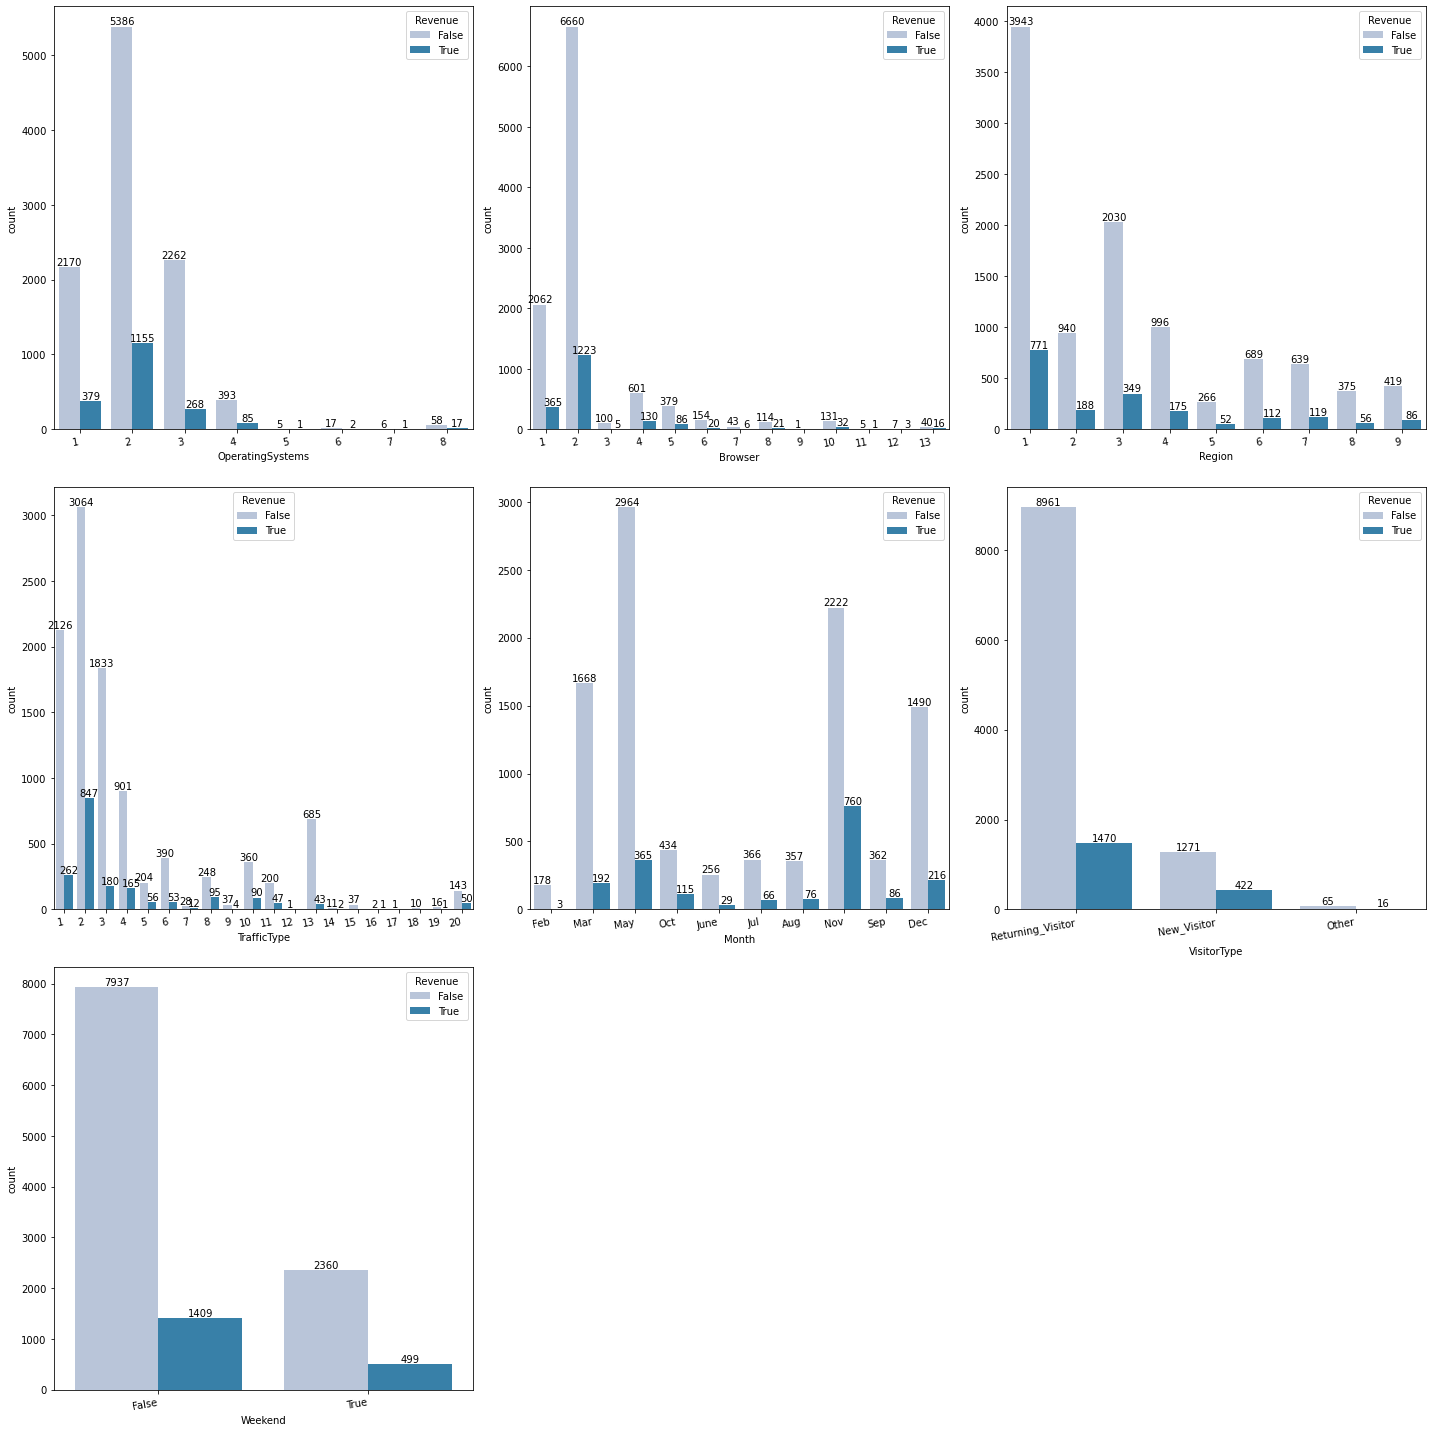

In [14]:
# Categorical Features vs Revenue
selected_categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType','Month', 'VisitorType', 'Weekend']

plt.figure(figsize=(20,20))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3+1, i)
    ax=sns.countplot(x=data[features[i-1]],hue=data['Revenue'], palette = 'PuBu')
    plt.xlabel(features[i-1])
    plt.xticks(rotation = 10, ha='right')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.tight_layout()


**Observation**
1. `operating_system` type 2 is the most popular and generate the largest quantity of purchased customers than others operating system type
2. `browser` type 2 is the most poular and generates the largest puerchased customers than others browser types
3. `traffic type` type 2 is the most popular and generates the largest revenue than other traffic type
4. `month` may has a lot of vistors but the most purchased customers generates at november, the visitors could improve by maximzing campaign for special day each month by offering special discount or special sale, 
5. not a half revisit `visitors_type` generate revenue so did the new vistors, we can improve this condition by giving reward to revisit visitor whenever they are create transaction and special offering for the new member
6. visitor generate purchased more at weekday than `weekend`
7. `Region` type 2 is the most popular and generates the most purchased customers

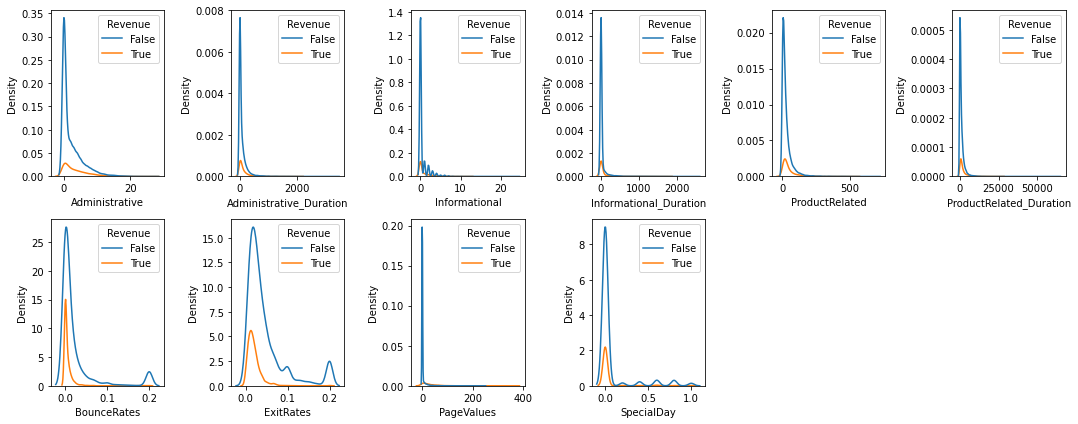

In [15]:
# Numerical Features vs Revenue
plt.figure(figsize=(15,6))

features = numericals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.kdeplot(x=data[features[i-1]], hue=data['Revenue'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

**Observation**:

1. All the numeric features plot the same distribution for purchased or unpurchased visitor where all of the features are postiviely skewed which mean that most of the population distributed in low frequency/range
2. most of purchased customers have lower density that unpurchased customers
3.  `Revenue` vs All `Pages Duration` : Visitors that generates revenue morelikely spent shorter duration at each pages than visitors without reven
4. `Revenue` vs `Visited Page`s : For each pages, number of visits by visitors with revenue is lower than the visits by visitors without revenue
3. `Bounce Rates` vs `Revenue` : most of visitors with revenue experience less bounce rates
4. `Exit Rates` vs `Revenue` : most of visitors with revenue experience less exit rates
6. `Special day` : density of visitors who didn't make purchase at special day are higher than who did

# Multicollinearity Study

<AxesSubplot:>

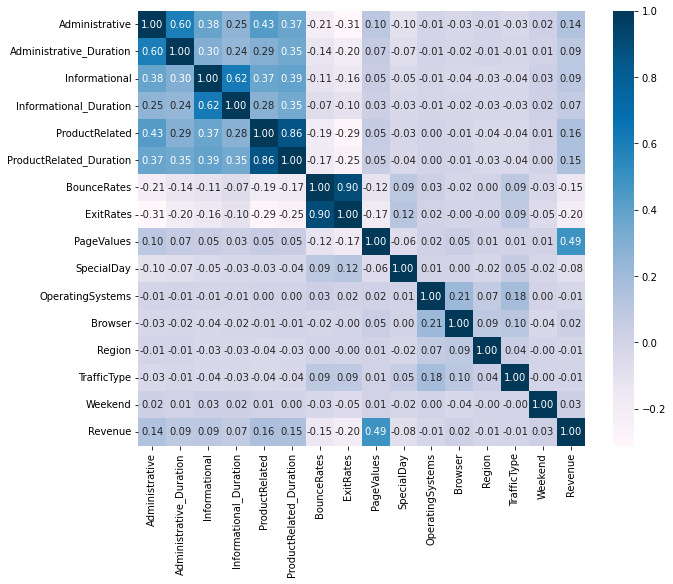

In [16]:
corr = data.corr()
plt.figure(figsize=(10,8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = 'PuBu')

**Observation :**
1. `PageValues` have highest postive correlation to `Revenue`
2. `ExitRates`-`BounceRates` have high correlation to each other but both features have weak correlation to `revenue`
3. `ProductRelated - ProductRelated_Duration` have high correlation to each other

## Visitor type vs BounceRates according to Revenue

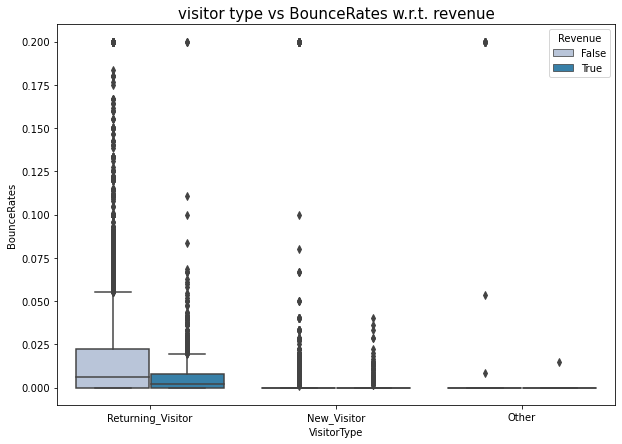

In [17]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'PuBu')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 15)
plt.show()

**Observation** : 
- returning visitors morelikely experience one page session this is should be a concern for the company because need to boost they call to action starategy for the returning visitors to finish they purchased 

## Vistor type vs Exit Rates according to Revenue

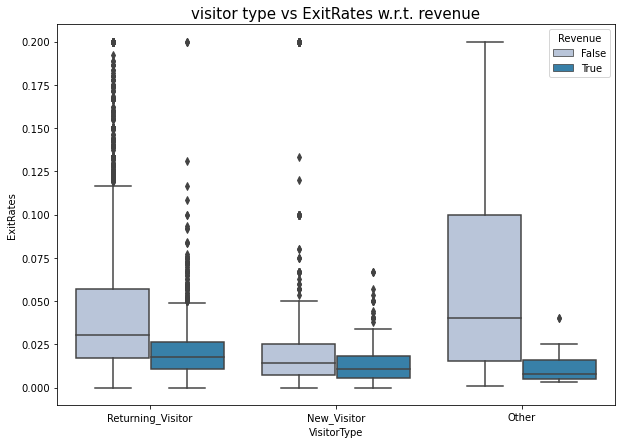

In [18]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'PuBu')
plt.title('visitor type vs ExitRates w.r.t. revenue', fontsize = 15)
plt.show()

**Observation**
1. Returning and new vistors distribution have lots of outlier
2. returning visitors experience more exit rates than new visitors

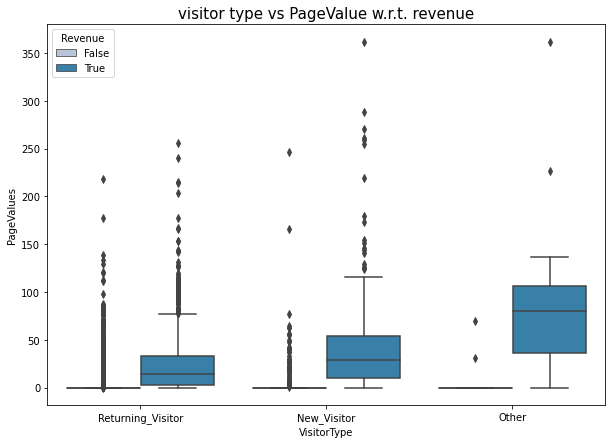

In [20]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'PuBu')
plt.title('visitor type vs PageValue w.r.t. revenue', fontsize = 15)
plt.show()

**Observation**
1. Visitors with high page value morelikely generates revenue
2. other visitors experience more higher page value 


## Find the median value of Bounce Rates and Exit Rates that generates Revenue

<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

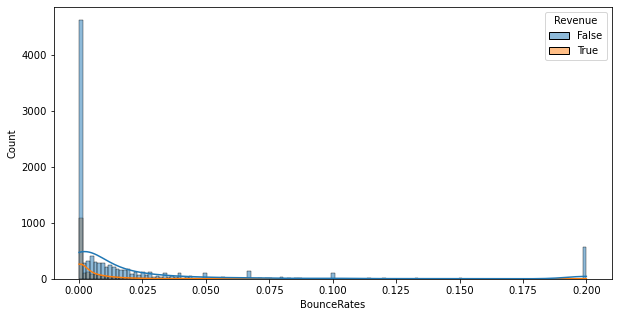

In [21]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = data
            ,x = 'BounceRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

<AxesSubplot:xlabel='ExitRates', ylabel='Count'>

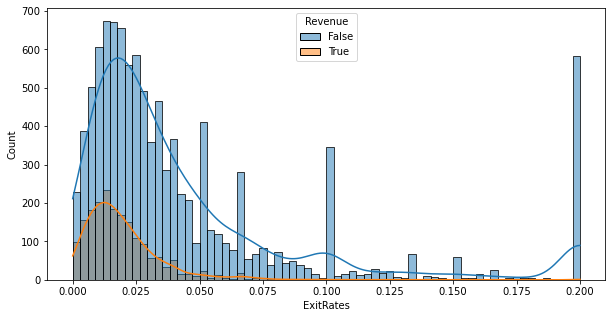

In [22]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = data
            ,x = 'ExitRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [23]:
# copy the data
r = data.copy()


In [24]:
# function to check outlier
def check_outlier(data,column):
    q1 = r[column].quantile(0.25)
    q3 = r[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not out-lier' for x in data[column].values]

In [25]:
# BounceRates Outlier
r['outlier_br'] = check_outlier(data=r, column='BounceRates')

In [26]:
r[r['outlier_br']=='outlier']

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,outlier_br
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,outlier
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,outlier
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,outlier
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False,outlier
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12165,0,0.0,0,0.0,20,1008.500000,0.080000,0.120000,0.0,0.0,Dec,2,2,3,1,Returning_Visitor,True,False,outlier
12167,0,0.0,0,0.0,8,189.500000,0.075000,0.100000,0.0,0.0,Dec,3,2,1,13,Returning_Visitor,False,False,outlier
12176,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,1,4,1,Returning_Visitor,False,False,outlier
12196,0,0.0,0,0.0,6,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,False,False,outlier


In [27]:
# Exit Rates Outlier
r['outlier_er'] = check_outlier(data=r, column='ExitRates')

In [28]:
r[r['outlier_er']=='outlier']

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,outlier_br,outlier_er
0,0,0.0,0,0.0,1,0.000000,0.200,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,outlier,outlier
1,0,0.0,0,0.0,2,64.000000,0.000,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,not out-lier,outlier
2,0,0.0,0,0.0,1,0.000000,0.200,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,outlier,outlier
3,0,0.0,0,0.0,2,2.666667,0.050,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,outlier,outlier
6,0,0.0,0,0.0,1,0.000000,0.200,0.20,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False,outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,0,0.0,0,0.0,2,40.500000,0.000,0.10,0.0,0.0,Dec,1,1,3,3,Other,False,False,not out-lier,outlier
12165,0,0.0,0,0.0,20,1008.500000,0.080,0.12,0.0,0.0,Dec,2,2,3,1,Returning_Visitor,True,False,outlier,outlier
12167,0,0.0,0,0.0,8,189.500000,0.075,0.10,0.0,0.0,Dec,3,2,1,13,Returning_Visitor,False,False,outlier,outlier
12176,0,0.0,0,0.0,2,0.000000,0.200,0.20,0.0,0.0,Nov,1,1,4,1,Returning_Visitor,False,False,outlier,outlier


In [29]:
# Excluding outlier of Bounce Rates
r1 = r.loc[r['outlier_br'] == 'not out-lier']
r1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,outlier_br,outlier_er
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,not out-lier,outlier
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,not out-lier,not out-lier
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,not out-lier,not out-lier
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False,not out-lier,outlier
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,not out-lier,not out-lier


In [30]:
# Bounce Rates Median Value
r1.groupby('Revenue').agg({'BounceRates':['median']})

,BounceRates
,median
Revenue,
False,0.0
True,0.0


<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

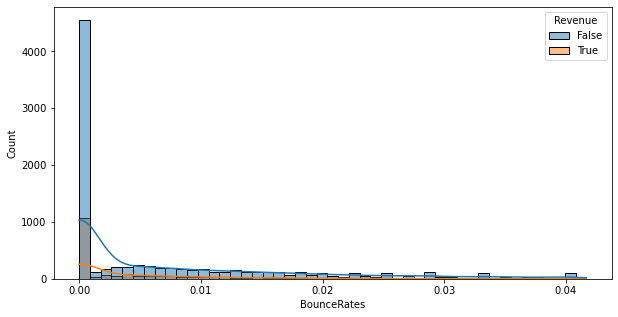

In [31]:
# Bounce Rates final distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r1
            ,x = 'BounceRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )


`BounceRates treshold` :
- 0  encode as 1
- greather than 0 encode as  0

In [32]:
# Excluding Outlier of Exit Rates
r2 = r.loc[r['outlier_er'] == 'not out-lier']
r2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,outlier_br,outlier_er
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,not out-lier,not out-lier
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,not out-lier,not out-lier
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,not out-lier,not out-lier
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False,not out-lier,not out-lier
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.0,0.4,Feb,1,1,4,3,Returning_Visitor,False,False,not out-lier,not out-lier


In [33]:
# Exit Rates Median Value
r2.groupby('Revenue').agg({'ExitRates':['median']})

,ExitRates
,median
Revenue,
False,0.024749
True,0.015909


<AxesSubplot:xlabel='ExitRates', ylabel='Count'>

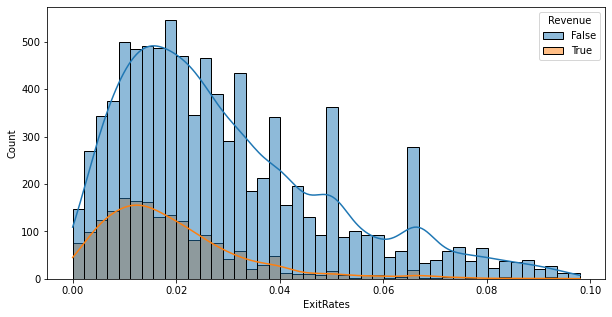

In [34]:
# Final distribution of Exit Rates
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r2
            ,x = 'ExitRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

ExitRates treshold:

- <= 0.015909 : enode as 1
- greather than  0.015909 : encode as 0


# Month vs Numericals Features

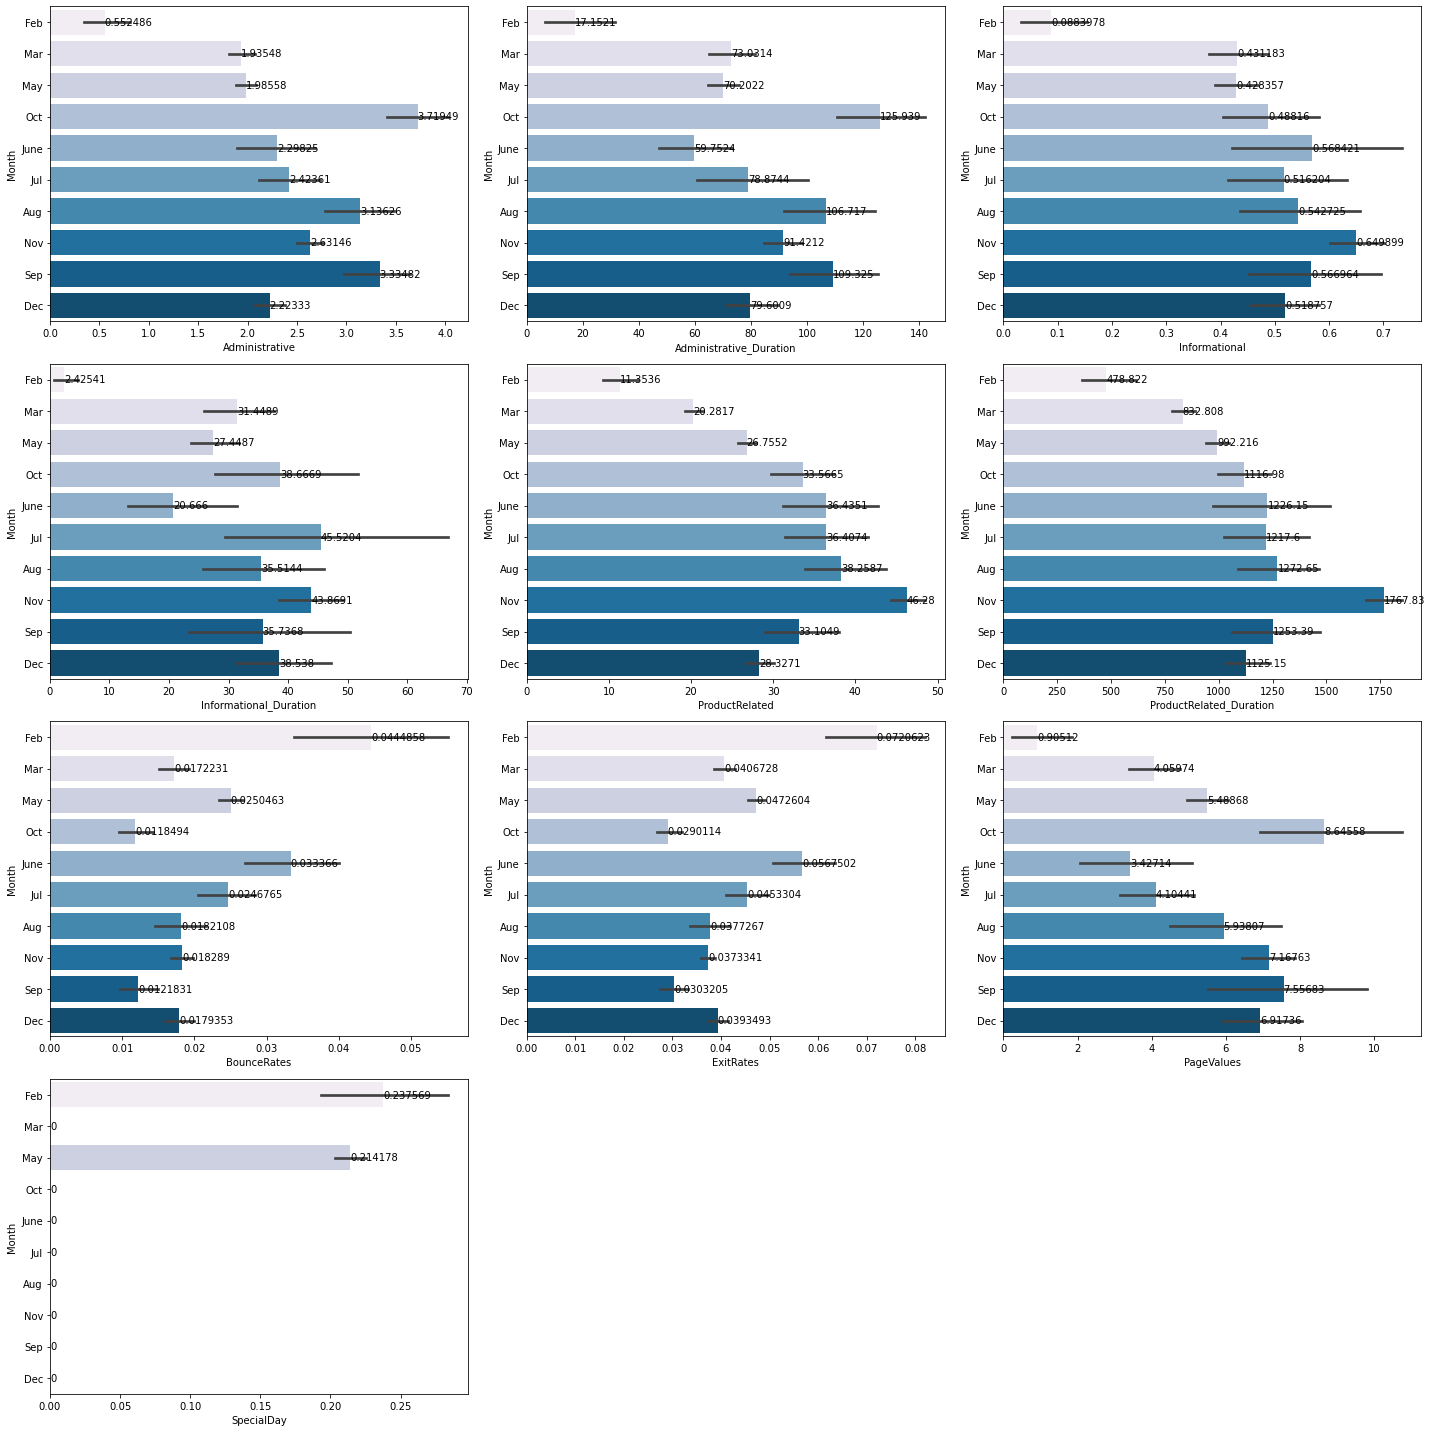

In [37]:
# Month vs Numcerical Features
plt.figure(figsize=(20,20))

features = numericals
for i in np.arange(1, len(features)+1):
    plt.subplot(4, len(features)//4+1, i)
    ax=sns.barplot(x=data[features[i-1]],y=data['Month'], palette = 'PuBu')
    plt.xlabel(features[i-1])
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

**Observation**:
1. Purchased according to special day only happen at May and February, we can imply that the special day has not been used optimally. So that efforts can be made in the form of a special day campaign to attract customers to make purchases and offer discounts on special days
2. At the beginning of February the `Bounce Rates` and `Exit Rates` were quite high compared to the following months, possibly because the website was launched because the administrative page has a lower value and duration.

# Data PreProcessing

In [19]:
# Copy dataset for modeling
df = data.copy()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [20]:
# Perform One Hot Encoding
df = pd.get_dummies(df)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Change revenue and weekend to int data type
# 1 = true
# 0 = false
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [22]:
# Encode BounceRates value
condition = [
    (df['BounceRates'] == 0),
    (df['BounceRates'] > 0)
]

values = [1, 0]

df['Cat_BounceRates'] = np.select(condition, values)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cat_BounceRates
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df['Cat_BounceRates'].value_counts()

0    6687
1    5518
Name: Cat_BounceRates, dtype: int64

In [24]:
# Encode Exit Rates Value

condition = [
    (df['ExitRates'] <= 0.015909),
    (df['ExitRates'] > 0.01590)
]

values = [1, 0]

df['Cat_ExitRates'] = np.select(condition, values)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cat_BounceRates,Cat_ExitRates
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df['Cat_ExitRates'].value_counts()

0    8572
1    3633
Name: Cat_ExitRates, dtype: int64

In [26]:
# drop Bouncerates dan exitrates
df1 = df.drop(['BounceRates','ExitRates'], axis=1)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,OperatingSystems,Browser,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cat_BounceRates,Cat_ExitRates
0,0,0.0,0,0.0,1,0.000000,0.0,0.0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.0,0.0,2,2,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.0,0.0,4,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.0,0.0,3,2,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.0,0.0,3,3,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df1['Revenue'].value_counts()

0    10297
1     1908
Name: Revenue, dtype: int64

In [28]:
# Split the data

X= df1.drop(columns='Revenue', axis=1)
y = df1[['Revenue']]



In [29]:
# Perform Standar Scaler
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the dataframe
scaler.fit(X)

# Transform the dataframe
scaled_df1 = scaler.transform(X)

# Convert the scaled data back to a dataframe
scaled_df1 = pd.DataFrame(scaled_df1, columns=X.columns)

In [30]:
scaled_df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,OperatingSystems,Browser,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cat_BounceRates,Cat_ExitRates
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,-0.318962,-0.31024,-1.239776,-0.794017,...,-0.424025,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.318962,-0.31024,-0.136980,-0.209237,...,-0.424025,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,-0.651016
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,-0.318962,-0.31024,2.068612,-0.794017,...,-0.424025,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,-0.318962,-0.31024,0.965816,-0.209237,...,-0.424025,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.318962,-0.31024,0.965816,0.375543,...,-0.424025,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016


In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df1, y, test_size=0.20, random_state=23)

print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9764, 28)
Shape of y_train : (9764, 1)
Shape of X_test : (2441, 28)
Shape of y_test : (2441, 1)


In [32]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,OperatingSystems,Browser,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cat_BounceRates,Cat_ExitRates
4736,0.498791,0.184168,-0.398824,-0.246257,0.514766,0.021034,-0.318962,-0.31024,0.965816,-0.209237,...,-0.424025,1.632871,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,1.536061
334,-0.702302,-0.460019,-0.398824,-0.246257,0.380212,0.092228,-0.318962,-0.31024,-0.136980,-0.209237,...,2.358353,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,1.536061
1911,0.799064,1.869761,-0.398824,-0.246257,-0.158003,1.186363,-0.318962,-0.31024,-0.136980,0.960324,...,2.358353,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,-0.651016
2118,-0.702302,-0.460019,-0.398824,-0.246257,-0.628941,-0.586335,-0.318962,-0.31024,-1.239776,-0.794017,...,-0.424025,1.632871,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,-0.651016
304,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.625146,-0.318962,-0.31024,-0.136980,-0.209237,...,2.358353,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,-0.651016


In [33]:
y_train.value_counts()

Revenue
0          8228
1          1536
dtype: int64

In [34]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Administrative,1.932886
2,Administrative_Duration,1.689588
3,Informational,1.851639
4,Informational_Duration,1.646591
5,ProductRelated,5.034808
6,ProductRelated_Duration,4.802921
7,PageValues,1.065078
8,SpecialDay,1.343060
9,OperatingSystems,1.136564
10,Browser,1.110120


<AxesSubplot:>

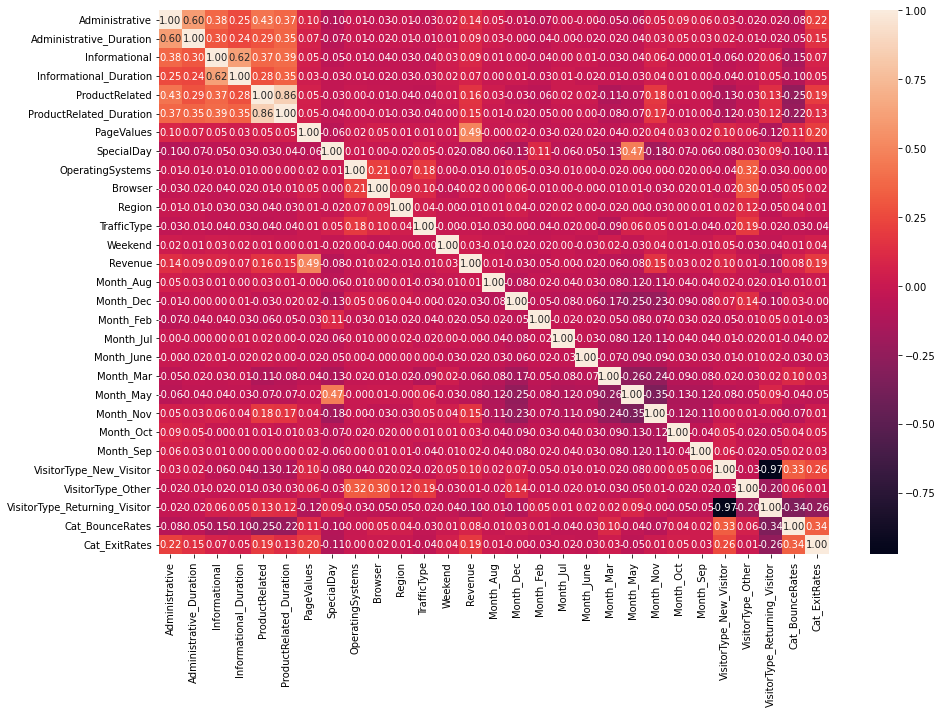

In [35]:
# heatmap correlation

df_train = pd.concat([X_train, y_train], axis=1)
corr = df_train.corr()
plt.figure(figsize=(15,10))
correlation = df1.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [36]:
X_train = X_train.drop(columns = ['ProductRelated_Duration'])
X_test = X_test.drop(columns=['ProductRelated_Duration'])

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9764 entries, 4736 to 8787
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 9764 non-null   float64
 1   Administrative_Duration        9764 non-null   float64
 2   Informational                  9764 non-null   float64
 3   Informational_Duration         9764 non-null   float64
 4   ProductRelated                 9764 non-null   float64
 5   PageValues                     9764 non-null   float64
 6   SpecialDay                     9764 non-null   float64
 7   OperatingSystems               9764 non-null   float64
 8   Browser                        9764 non-null   float64
 9   Region                         9764 non-null   float64
 10  TrafficType                    9764 non-null   float64
 11  Weekend                        9764 non-null   float64
 12  Month_Aug                      9764 non-null 

In [64]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Administrative,1.910734
2,Administrative_Duration,1.628125
3,Informational,1.847572
4,Informational_Duration,1.623936
5,ProductRelated,1.520783
6,PageValues,1.064623
7,SpecialDay,1.341692
8,OperatingSystems,1.136556
9,Browser,1.110027
10,Region,1.023877


In [53]:
def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('AUC Score Train:', roc_auc_score(y_train, y_pred_train))
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    
    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('AUC Score Test :', roc_auc_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix Data Test:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

## 1. Decision Tree

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
evaluate(dt, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.9998975829578042
AUC Score Train: 0.9996744791666667
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8228
           1       1.00      1.00      1.00      1536

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1535
True Negative: 8228
False Positive: 0
False Negative: 1

Precision Data Train: 1.0
Recall Data Train: 0.9993489583333334
F1-Score Data Train: 0.9996743731683491
======= Data Test =======
Accuracy: 0.8586644817697665
AUC Score Test : 0.741341071734826
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2069
           1       0.53      0.57      0.55       372

    acc

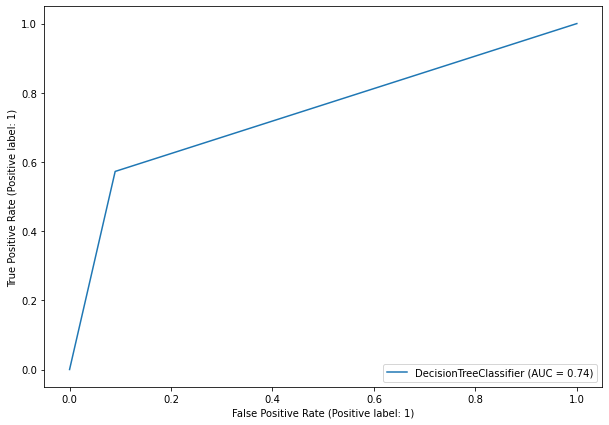

In [60]:
#ROC AUC Curve
metrics.plot_roc_curve(dt, X_test, y_test)  
plt.show()  

## 2. Random Forest

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [62]:
evaluate(rf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.9998975829578042
AUC Score Train: 0.9999392318911036
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8228
           1       1.00      1.00      1.00      1536

    accuracy                           1.00      9764
   macro avg       1.00      1.00      1.00      9764
weighted avg       1.00      1.00      1.00      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1536
True Negative: 8227
False Positive: 1
False Negative: 0

Precision Data Train: 0.9993493819128172
Recall Data Train: 1.0
F1-Score Data Train: 0.9996745850959974
======= Data Test =======
Accuracy: 0.8971732896353953
AUC Score Test : 0.7585452428839448
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2069
           1       0.71      0.56      0.62       372

    ac

## 3.  SVM

In [63]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [64]:
evaluate(svc_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.9047521507578861
AUC Score Train: 0.7390965554610274
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8228
           1       0.83      0.50      0.62      1536

    accuracy                           0.90      9764
   macro avg       0.87      0.74      0.78      9764
weighted avg       0.90      0.90      0.89      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 764
True Negative: 8070
False Positive: 158
False Negative: 772

Precision Data Train: 0.8286334056399133
Recall Data Train: 0.4973958333333333
F1-Score Data Train: 0.6216436126932465
======= Data Test =======
Accuracy: 0.8951249487914789
AUC Score Test : 0.7044206073267955
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2069
           1       0.78      0.43      0.56

## 4. Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [66]:
evaluate(nb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.7831831216714461
AUC Score Train: 0.7225628823326852
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      8228
           1       0.39      0.63      0.48      1536

    accuracy                           0.78      9764
   macro avg       0.65      0.72      0.67      9764
weighted avg       0.84      0.78      0.80      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 974
True Negative: 6673
False Positive: 1555
False Negative: 562

Precision Data Train: 0.38513246342427837
Recall Data Train: 0.6341145833333334
F1-Score Data Train: 0.4792127921279213
======= Data Test =======
Accuracy: 0.7738631708316264
AUC Score Test : 0.6946241756185784
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2069
           1       0.35      0.58      0.

## 5. Xgboost

In [67]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
evaluate(xgb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.9750102417042196
AUC Score Train: 0.9295745092975206
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8228
           1       0.97      0.86      0.92      1536

    accuracy                           0.98      9764
   macro avg       0.98      0.93      0.95      9764
weighted avg       0.98      0.98      0.97      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1326
True Negative: 8194
False Positive: 34
False Negative: 210

Precision Data Train: 0.975
Recall Data Train: 0.86328125
F1-Score Data Train: 0.9157458563535911
======= Data Test =======
Accuracy: 0.9004506349856616
AUC Score Test : 0.7869367051767774
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2069
           1       0.69      0.62      0.66       372

    accur

## 6. KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
evaluate(knn, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.897378123719787
AUC Score Train: 0.7146000445632799
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8228
           1       0.82      0.45      0.58      1536

    accuracy                           0.90      9764
   macro avg       0.86      0.71      0.76      9764
weighted avg       0.89      0.90      0.88      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 688
True Negative: 8074
False Positive: 154
False Negative: 848

Precision Data Train: 0.8171021377672208
Recall Data Train: 0.4479166666666667
F1-Score Data Train: 0.5786375105130361
======= Data Test =======
Accuracy: 0.8738222040147481
AUC Score Test : 0.6422450978863613
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2069
           1       0.69      0.31      0.43 

## 7.Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [72]:
evaluate(log_reg, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.8839614911921344
AUC Score Train: 0.6822821716496515
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      8228
           1       0.76      0.39      0.51      1536

    accuracy                           0.88      9764
   macro avg       0.83      0.68      0.72      9764
weighted avg       0.87      0.88      0.87      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 596
True Negative: 8035
False Positive: 193
False Negative: 940

Precision Data Train: 0.7553865652724968
Recall Data Train: 0.3880208333333333
F1-Score Data Train: 0.5126881720430108
======= Data Test =======
Accuracy: 0.8832445718967636
AUC Score Test : 0.666544536085689
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2069
           1       0.75      0.35      0.48 

### SMOTE

In [73]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('Before Handling SMOTE',Counter(y_train))

# define undersample strategy
smote = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# summarize class distribution
print('After Handling SMOTE',Counter(y_train_SMOTE))

Before Handling SMOTE Counter({'Revenue': 1})
After Handling SMOTE Counter({'Revenue': 1})


In [74]:
y_train_SMOTE.value_counts()

Revenue
0          8228
1          8228
dtype: int64

In [118]:
def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('AUC Score Train:', roc_auc_score(y_train, y_pred_train))
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    
    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('AUC Score Train:', roc_auc_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix Data Test:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

# Decision Tree

In [119]:
dt_SMOTE = DecisionTreeClassifier()
dt_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

DecisionTreeClassifier()

In [120]:
evaluate(dt_SMOTE,  x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
Accuracy Data Train: 0.9999392318911036
AUC Score Train: 0.9999392318911036
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8228
           1       1.00      1.00      1.00      8228

    accuracy                           1.00     16456
   macro avg       1.00      1.00      1.00     16456
weighted avg       1.00      1.00      1.00     16456

------
Assuming 1 as positive, we get for Data Train:

True Positive: 8227
True Negative: 8228
False Positive: 0
False Negative: 1

Precision Data Train: 1.0
Recall Data Train: 0.9998784637822071
F1-Score Data Train: 0.9999392281981161
======= Data Test =======
Accuracy: 0.8471937730438345
AUC Score Train: 0.7422914815219029
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2069
           1       0.50      0.59      0.54       372

    ac

## Random Forest

In [121]:
rf_SMOTE = RandomForestClassifier()
rf_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [122]:
evaluate(rf_SMOTE,  x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
Accuracy Data Train: 0.9999392318911036
AUC Score Train: 0.9999392318911036
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8228
           1       1.00      1.00      1.00      8228

    accuracy                           1.00     16456
   macro avg       1.00      1.00      1.00     16456
weighted avg       1.00      1.00      1.00     16456

------
Assuming 1 as positive, we get for Data Train:

True Positive: 8228
True Negative: 8227
False Positive: 1
False Negative: 0

Precision Data Train: 0.9998784785514643
Recall Data Train: 1.0
F1-Score Data Train: 0.9999392355836422
======= Data Test =======
Accuracy: 0.8934862761163458
AUC Score Train: 0.812593871643358
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2069
           1       0.64      0.70      0.67       372

    acc

## SVM

In [123]:
from sklearn.svm import SVC
svc_model_SMOTE = SVC()
svc_model_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

SVC()

In [124]:
evaluate(svc_model_SMOTE,  x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
Accuracy Data Train: 0.9006441419543024
AUC Score Train: 0.9006441419543024
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8228
           1       0.90      0.91      0.90      8228

    accuracy                           0.90     16456
   macro avg       0.90      0.90      0.90     16456
weighted avg       0.90      0.90      0.90     16456

------
Assuming 1 as positive, we get for Data Train:

True Positive: 7455
True Negative: 7366
False Positive: 862
False Negative: 773

Precision Data Train: 0.8963568594445113
Recall Data Train: 0.9060525036460866
F1-Score Data Train: 0.9011786038077969
======= Data Test =======
Accuracy: 0.8574354772634166
AUC Score Train: 0.8078639101534687
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2069
           1       0.52      0.74      0.6

## KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn_SMOTE = KNeighborsClassifier()
knn_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

KNeighborsClassifier()

In [126]:
evaluate(knn_SMOTE,  x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
Accuracy Data Train: 0.9272605736509479
AUC Score Train: 0.9272605736509479
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8228
           1       0.88      0.99      0.93      8228

    accuracy                           0.93     16456
   macro avg       0.93      0.93      0.93     16456
weighted avg       0.93      0.93      0.93     16456

------
Assuming 1 as positive, we get for Data Train:

True Positive: 8157
True Negative: 7102
False Positive: 1126
False Negative: 71

Precision Data Train: 0.8787030054939136
Recall Data Train: 0.9913709285367039
F1-Score Data Train: 0.9316429672777111
======= Data Test =======
Accuracy: 0.7795985251945924
AUC Score Train: 0.7090316863894561
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2069
           1       0.37      0.61      0.4

## logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
log_reg_SMOTE = LogisticRegression()
log_reg_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [128]:
evaluate(log_reg_SMOTE,  x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
Accuracy Data Train: 0.8270539620807
AUC Score Train: 0.8270539620807
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      8228
           1       0.88      0.76      0.81      8228

    accuracy                           0.83     16456
   macro avg       0.83      0.83      0.83     16456
weighted avg       0.83      0.83      0.83     16456

------
Assuming 1 as positive, we get for Data Train:

True Positive: 6239
True Negative: 7371
False Positive: 857
False Negative: 1989

Precision Data Train: 0.8792277339346111
Recall Data Train: 0.7582644628099173
F1-Score Data Train: 0.81427825632994
======= Data Test =======
Accuracy: 0.8631708316263826
AUC Score Train: 0.804632646803557
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2069
           1       0.54      0.72      0.62       

# Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB
nb_model_SMOTE = GaussianNB()
nb_model_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

GaussianNB()

In [130]:
evaluate(nb_model_SMOTE,  x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
Accuracy Data Train: 0.7232620320855615
AUC Score Train: 0.7232620320855614
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      8228
           1       0.70      0.77      0.74      8228

    accuracy                           0.72     16456
   macro avg       0.73      0.72      0.72     16456
weighted avg       0.73      0.72      0.72     16456

------
Assuming 1 as positive, we get for Data Train:

True Positive: 6354
True Negative: 5548
False Positive: 2680
False Negative: 1874

Precision Data Train: 0.7033429267212752
Recall Data Train: 0.7722411278561011
F1-Score Data Train: 0.7361835245046924
======= Data Test =======
Accuracy: 0.68578451454322
AUC Score Train: 0.7253484619342365
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      2069
           1       0.30      0.78      0.4

# XGBoost

In [131]:
import xgboost as xgb
xgb_model_SMOTE = xgb.XGBClassifier()
xgb_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
evaluate(xgb_model_SMOTE,  x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
Accuracy Data Train: 0.9846864365580943
AUC Score Train: 0.9846864365580943
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8228
           1       0.99      0.98      0.98      8228

    accuracy                           0.98     16456
   macro avg       0.98      0.98      0.98     16456
weighted avg       0.98      0.98      0.98     16456

------
Assuming 1 as positive, we get for Data Train:

True Positive: 8027
True Negative: 8177
False Positive: 51
False Negative: 201

Precision Data Train: 0.9936865560782372
Recall Data Train: 0.9755712202236266
F1-Score Data Train: 0.984545566049307
======= Data Test =======
Accuracy: 0.8943056124539124
AUC Score Train: 0.7822093422098879
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2069
           1       0.66      0.62      0.64 

## Undersampling : Random Under Sampling

In [133]:
y_train

,Revenue
4736,0
334,0
1911,0
2118,0
304,0
...,...
9704,0
11190,0
10185,0
9256,1


In [134]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,PageValues,SpecialDay,OperatingSystems,Browser,Region,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cat_BounceRates,Cat_ExitRates
4736,0.498791,0.184168,-0.398824,-0.246257,0.514766,-0.318962,-0.31024,0.965816,-0.209237,-0.063814,...,-0.424025,1.632871,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,1.536061
334,-0.702302,-0.460019,-0.398824,-0.246257,0.380212,-0.318962,-0.31024,-0.136980,-0.209237,-0.896370,...,2.358353,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,1.536061
1911,0.799064,1.869761,-0.398824,-0.246257,-0.158003,-0.318962,-0.31024,-0.136980,0.960324,-0.896370,...,2.358353,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,-0.651016
2118,-0.702302,-0.460019,-0.398824,-0.246257,-0.628941,-0.318962,-0.31024,-1.239776,-0.794017,-0.480092,...,-0.424025,1.632871,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,-0.651016
304,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.318962,-0.31024,-0.136980,-0.209237,-0.896370,...,2.358353,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,1.100842,-0.651016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,-0.702302,-0.460019,-0.398824,-0.246257,0.380212,-0.318962,-0.31024,0.965816,-0.209237,1.601297,...,-0.424025,-0.612418,1.758662,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016
11190,-0.702302,-0.460019,-0.398824,-0.246257,1.254812,-0.318962,-0.31024,-0.136980,-0.209237,-0.896370,...,-0.424025,-0.612418,1.758662,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016
10185,-0.702302,-0.460019,-0.398824,-0.246257,-0.247705,-0.318962,-0.31024,-0.136980,-0.209237,-0.063814,...,-0.424025,-0.612418,-0.568614,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016
9256,0.198517,0.266804,-0.398824,-0.246257,0.940853,-0.096935,-0.31024,-0.136980,2.129885,2.433853,...,-0.424025,-0.612418,1.758662,-0.217026,-0.195205,-0.401315,-0.081737,0.412395,-0.908396,-0.651016


In [135]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('Before Handling RandomUnderSampling',Counter(y_train))

# define undersample strategy
undersample = RandomUnderSampler()

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train,y_train)

# summarize class distribution
print('After Handling RandomUnderSampling',Counter(y_train_under))

Before Handling RandomUnderSampling Counter({'Revenue': 1})
After Handling RandomUnderSampling Counter({'Revenue': 1})


## Decision Tree


In [136]:
dt_under = DecisionTreeClassifier()
dt_under.fit(X_train_under,y_train_under)

DecisionTreeClassifier()

In [137]:
evaluate(dt_under,  x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
Accuracy Data Train: 1.0
AUC Score Train: 1.0
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1536
           1       1.00      1.00      1.00      1536

    accuracy                           1.00      3072
   macro avg       1.00      1.00      1.00      3072
weighted avg       1.00      1.00      1.00      3072

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1536
True Negative: 1536
False Positive: 0
False Negative: 0

Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0
======= Data Test =======
Accuracy: 0.794756247439574
AUC Score Train: 0.795142840809284
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2069
           1       0.41      0.80      0.54       372

    accuracy                           0.79      2441
   macro avg  

## Random Forest

In [138]:
rf_under = RandomForestClassifier()
rf_under.fit(X_train_under,y_train_under)

RandomForestClassifier()

In [139]:
evaluate(rf_under,  x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
Accuracy Data Train: 0.9996744791666666
AUC Score Train: 0.9996744791666667
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1536
           1       1.00      1.00      1.00      1536

    accuracy                           1.00      3072
   macro avg       1.00      1.00      1.00      3072
weighted avg       1.00      1.00      1.00      3072

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1535
True Negative: 1536
False Positive: 0
False Negative: 1

Precision Data Train: 1.0
Recall Data Train: 0.9993489583333334
F1-Score Data Train: 0.9996743731683491
======= Data Test =======
Accuracy: 0.8320360507988529
AUC Score Train: 0.8424898787529169
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2069
           1       0.47      0.86      0.61       372

    ac

## SVM 

In [140]:
from sklearn.svm import SVC
svc_model_under = SVC()
svc_model_under.fit(X_train_under,y_train_under)

SVC()

In [141]:
evaluate(svc_model_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
Accuracy Data Train: 0.8636067708333334
AUC Score Train: 0.8636067708333335
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1536
           1       0.90      0.82      0.86      1536

    accuracy                           0.86      3072
   macro avg       0.87      0.86      0.86      3072
weighted avg       0.87      0.86      0.86      3072

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1253
True Negative: 1400
False Positive: 136
False Negative: 283

Precision Data Train: 0.9020878329733621
Recall Data Train: 0.8157552083333334
F1-Score Data Train: 0.8567521367521368
======= Data Test =======
Accuracy: 0.8484227775501844
AUC Score Train: 0.8102642957742819
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2069
           1       0.50      0.76      0.6

# Linear Regression

In [142]:
from sklearn.linear_model import LogisticRegression
log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_under,y_train_under)

LogisticRegression()

In [143]:
evaluate(log_reg_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
Accuracy Data Train: 0.8177083333333334
AUC Score Train: 0.8177083333333335
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1536
           1       0.87      0.75      0.80      1536

    accuracy                           0.82      3072
   macro avg       0.82      0.82      0.82      3072
weighted avg       0.82      0.82      0.82      3072

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1145
True Negative: 1367
False Positive: 169
False Negative: 391

Precision Data Train: 0.8713850837138508
Recall Data Train: 0.7454427083333334
F1-Score Data Train: 0.8035087719298246
======= Data Test =======
Accuracy: 0.8570258090946333
AUC Score Train: 0.8087246708970621
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2069
           1       0.52      0.74      0.6

# KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn_under = KNeighborsClassifier()
knn_under.fit(X_train_under, y_train_under)

KNeighborsClassifier()

In [145]:
evaluate(knn_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
Accuracy Data Train: 0.8274739583333334
AUC Score Train: 0.8274739583333333
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1536
           1       0.85      0.80      0.82      1536

    accuracy                           0.83      3072
   macro avg       0.83      0.83      0.83      3072
weighted avg       0.83      0.83      0.83      3072

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1225
True Negative: 1317
False Positive: 219
False Negative: 311

Precision Data Train: 0.8483379501385041
Recall Data Train: 0.7975260416666666
F1-Score Data Train: 0.8221476510067114
======= Data Test =======
Accuracy: 0.754608766898812
AUC Score Train: 0.7284653902721693
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2069
           1       0.35      0.69      0.46

# Naive Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB
nb_model_under = GaussianNB()
nb_model_under.fit(X_train_under,y_train_under)

GaussianNB()

In [147]:
evaluate(nb_model_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
Accuracy Data Train: 0.7431640625
AUC Score Train: 0.7431640625000001
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1536
           1       0.74      0.74      0.74      1536

    accuracy                           0.74      3072
   macro avg       0.74      0.74      0.74      3072
weighted avg       0.74      0.74      0.74      3072

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1142
True Negative: 1141
False Positive: 395
False Negative: 394

Precision Data Train: 0.7430058555627846
Recall Data Train: 0.7434895833333334
F1-Score Data Train: 0.743247640741946
======= Data Test =======
Accuracy: 0.711593609176567
AUC Score Train: 0.7152174703898304
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      2069
           1       0.31      0.72      0.43       

# XGBoost

In [148]:
import xgboost as xgb
xgb_model_under = xgb.XGBClassifier()
xgb_model_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [149]:
evaluate(xgb_model_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
Accuracy Data Train: 0.9908854166666666
AUC Score Train: 0.9908854166666667
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1536
           1       1.00      0.98      0.99      1536

    accuracy                           0.99      3072
   macro avg       0.99      0.99      0.99      3072
weighted avg       0.99      0.99      0.99      3072

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1511
True Negative: 1533
False Positive: 3
False Negative: 25

Precision Data Train: 0.9980184940554822
Recall Data Train: 0.9837239583333334
F1-Score Data Train: 0.9908196721311476
======= Data Test =======
Accuracy: 0.8217943465792708
AUC Score Train: 0.8397555829266645
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      2069
           1       0.46      0.87      0.60  

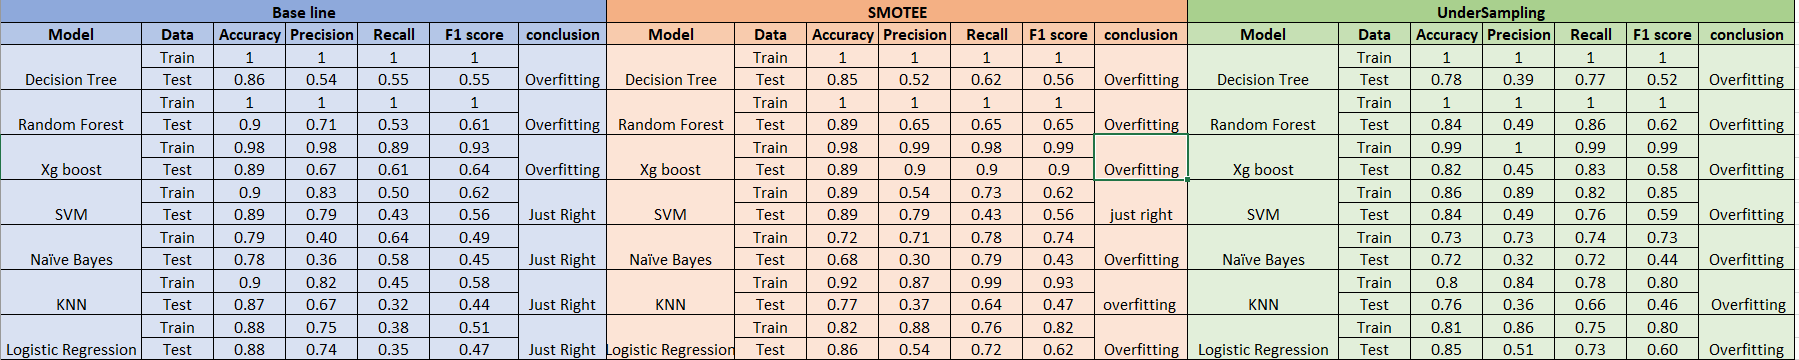

# HPtunning Parameter

 Perform Hypertunning Parameter for baseline model with the best model is SVM and Linear Regression

# 1.  SVM

In [150]:
from sklearn.model_selection import GridSearchCV
# hyperparameter tuning
parameters = {
    'degree': (1,2,3,4,5),
    'gamma' :('scale', 'auto'),
    'random_state' : (23,45),
    "max_iter" : (-1,50,100)
}

svm_gridcv = GridSearchCV(svc_model, parameters, cv=5, scoring='precision')
svm_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': (1, 2, 3, 4, 5), 'gamma': ('scale', 'auto'),
                         'max_iter': (-1, 50, 100), 'random_state': (23, 45)},
             scoring='precision')

In [151]:
# the compact result

cv_result = pd.DataFrame(svm_gridcv.cv_results_)
cv_result.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_gamma,param_max_iter,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.698086,0.208525,1.129470,0.116003,1,scale,-1,23,"{'degree': 1, 'gamma': 'scale', 'max_iter': -1...",0.767045,0.777778,0.748503,0.803468,0.770053,0.773370,0.017859,11
1,3.156097,0.789119,1.264056,0.405128,1,scale,-1,45,"{'degree': 1, 'gamma': 'scale', 'max_iter': -1...",0.767045,0.777778,0.748503,0.803468,0.770053,0.773370,0.017859,11
2,0.095872,0.031835,0.050558,0.010453,1,scale,50,23,"{'degree': 1, 'gamma': 'scale', 'max_iter': 50...",0.281346,0.386076,0.230032,0.391304,0.320000,0.321752,0.061682,21
3,0.091681,0.021049,0.045585,0.012767,1,scale,50,45,"{'degree': 1, 'gamma': 'scale', 'max_iter': 50...",0.281346,0.386076,0.230032,0.391304,0.320000,0.321752,0.061682,21
4,0.182129,0.037472,0.089506,0.023238,1,scale,100,23,"{'degree': 1, 'gamma': 'scale', 'max_iter': 10...",0.233929,0.241715,0.217848,0.258427,0.271930,0.244770,0.018846,41


In [152]:
# the best model
svm_gridcv.best_estimator_

SVC(degree=1, gamma='auto', random_state=23)

In [153]:
svc_gscv = SVC(degree=1, random_state=23)

In [154]:
svc_gscv.fit(X_train,y_train)

SVC(degree=1, random_state=23)

In [155]:
evaluate(svc_gscv,x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
Accuracy Data Train: 0.9047521507578861
AUC Score Train: 0.7390965554610274
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8228
           1       0.83      0.50      0.62      1536

    accuracy                           0.90      9764
   macro avg       0.87      0.74      0.78      9764
weighted avg       0.90      0.90      0.89      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 764
True Negative: 8070
False Positive: 158
False Negative: 772

Precision Data Train: 0.8286334056399133
Recall Data Train: 0.4973958333333333
F1-Score Data Train: 0.6216436126932465
======= Data Test =======
Accuracy: 0.8951249487914789
AUC Score Train: 0.7044206073267955
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2069
           1       0.78      0.43      0.56

# 2.  Logistic Regression

In [156]:
from sklearn.model_selection import GridSearchCV
# hyperparameter tuning
parameters = {
    'solver' : [ 'sag', 'saga'],
    'penalty':['none', 'elasticnet', 'l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100]
}  

log_reg_gridcv = GridSearchCV(log_reg, parameters, cv=5, scoring='precision')
log_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['none', 'elasticnet', 'l1', 'l2'],
                         'solver': ['sag', 'saga']},
             scoring='precision')

In [157]:
# the compact result

cv_result = pd.DataFrame(log_reg_gridcv.cv_results_)
cv_result.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.180660,0.023471,0.008561,0.003343,0.001,none,sag,"{'C': 0.001, 'penalty': 'none', 'solver': 'sag'}",0.721519,0.753086,0.762238,0.757764,0.748466,0.748615,0.014307,10
1,0.192400,0.052517,0.009832,0.005890,0.001,none,saga,"{'C': 0.001, 'penalty': 'none', 'solver': 'saga'}",0.721519,0.753086,0.762238,0.757764,0.748466,0.748615,0.014307,10
2,0.005670,0.005829,0.000000,0.000000,0.001,elasticnet,sag,"{'C': 0.001, 'penalty': 'elasticnet', 'solver'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
3,0.003124,0.006248,0.000000,0.000000,0.001,elasticnet,saga,"{'C': 0.001, 'penalty': 'elasticnet', 'solver'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
4,0.003003,0.006006,0.000000,0.000000,0.001,l1,sag,"{'C': 0.001, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36


In [158]:
# the best model
log_reg_gridcv.best_estimator_

LogisticRegression(C=0.001, penalty='l1', solver='saga')

In [159]:
log_reg_gscv = LogisticRegression(C=0.001, penalty='l1', solver='saga')

In [160]:
log_reg_gscv.fit(X_train,y_train)

LogisticRegression(C=0.001, penalty='l1', solver='saga')

In [161]:
evaluate(log_reg_gscv, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train )

======= Data Train =======
Accuracy Data Train: 0.8520073740270381
AUC Score Train: 0.5346526975976341
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8228
           1       0.85      0.07      0.13      1536

    accuracy                           0.85      9764
   macro avg       0.85      0.53      0.53      9764
weighted avg       0.85      0.85      0.80      9764

------
Assuming 1 as positive, we get for Data Train:

True Positive: 110
True Negative: 8209
False Positive: 19
False Negative: 1426

Precision Data Train: 0.8527131782945736
Recall Data Train: 0.07161458333333333
F1-Score Data Train: 0.13213213213213212
======= Data Test =======
Accuracy: 0.8529291274068005
AUC Score Train: 0.5218828118097673
------
Confusion Matrix Data Test:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2069
           1       0.81      0.05      0.

SVM perform the same before and after tunning parameter while Logistic Regression perform better at baseline model since it has the highes F1 score than after tunning parameter

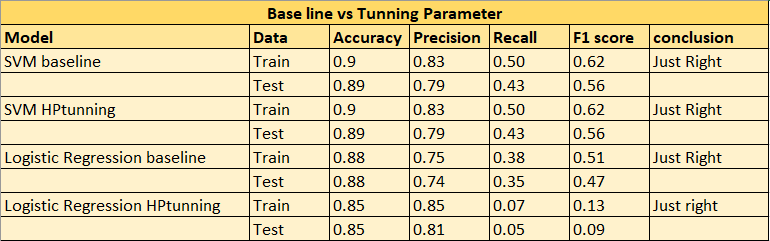

NameError: name 'log_reg_gridcv' is not defined

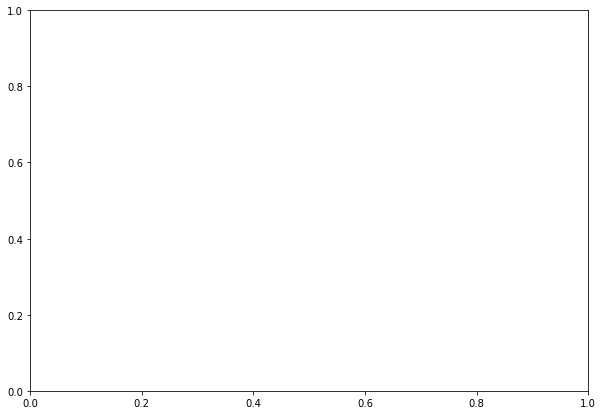

In [3]:
# plotting confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = log_reg_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=log_reg_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_reg_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()